In [8]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [10]:
import piplite
await piplite.install('seaborn')

In [11]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [12]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [13]:
await download(filepath, "kc_house_data.csv")
file_name="kc_house_data.csv"

In [19]:
df = pd.read_csv(file_name)

In [20]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [23]:
df.drop(columns=["id", "Unnamed: 0"], axis=1, inplace=True)

In [24]:
print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [27]:
floors_counts = df['floors'].value_counts()

In [28]:
floors_counts_df = floors_counts.to_frame()

In [31]:
print(floors_counts_df)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


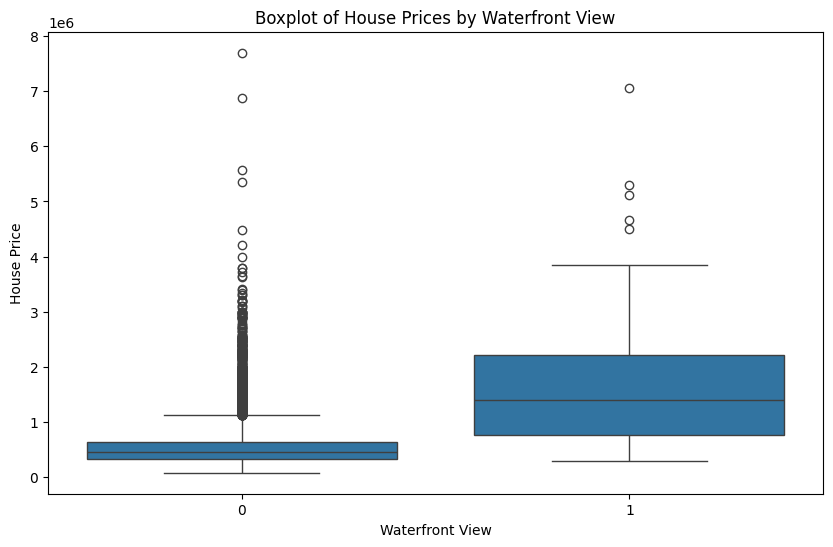

In [33]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of House Prices by Waterfront View')
plt.xlabel('Waterfront View')
plt.ylabel('House Price')
plt.show()

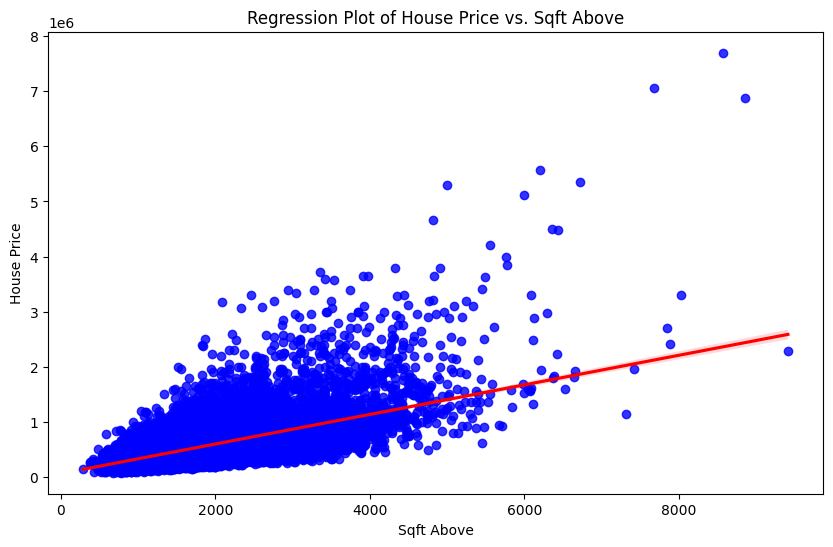

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Regression Plot of House Price vs. Sqft Above')
plt.xlabel('Sqft Above')
plt.ylabel('House Price')

plt.show()


In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['sqft_living']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = model.score(X, y)  
print(f'R^2: {r2}')

R^2: 0.4928532179037931


In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('kc_house_data.csv')

X = df[['sqft_living']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = model.score(X, y)  
print(f'R^2: {r2}')


R^2: 0.4928532179037931


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

df = pd.read_csv('kc_house_data.csv')

features = [
    "floors",
    "waterfront",
    "lat",
    "bedrooms",
    "sqft_basement",
    "view",
    "bathrooms",
    "sqft_living15",
    "sqft_above",
    "grade",
    "sqft_living"
]
X = df[features]
y = df['price']
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),            
    ('poly', PolynomialFeatures(degree=2)),  
    ('linear', LinearRegression())           
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')


R^2: 0.7123046808666824


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

df = pd.read_csv('kc_house_data.csv')

features = [
    "floors",
    "waterfront",
    "lat",
    "bedrooms",
    "sqft_basement",
    "view",
    "bathrooms",
    "sqft_living15",
    "sqft_above",
    "grade",
    "sqft_living"
]
X = df[features]
y = df['price']

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')


R^2: 0.6614094023121037


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

df = pd.read_csv('kc_house_data.csv') 

features = [
    "floors",
    "waterfront",
    "lat",
    "bedrooms",
    "sqft_basement",
    "view",
    "bathrooms",
    "sqft_living15",
    "sqft_above",
    "grade",
    "sqft_living"
]
X = df[features]
y = df['price']

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)
y_pred = ridge.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')


R^2: 0.700063610467895
